<h1><b>European Call Option Greeks Estimaiton Using Malliavin Calculus and Monte-Carlo Methods</b></h1>
<h2><b>1) Theory</b></h2>
<h3><b>a) General Setting</b></h3>
Let:
<ul>
<li>

$T,K \in \mathbb{R}_{\geqslant 0}$;
</li>
<li>

$S_{0}, r \in \mathbb{R}_{> 0}$;
</li>

<li>

$\sigma \in \mathbb{R}$;
</li>

<li>

$(W_{t})_{t \in \left[0,T\right]}$ be a $\mathbb{R}$-valued Brownian motion;
</li>

<li>

$(S_{t})_{t \in \left[0,T\right]}$ be a $\mathbb{R}$-valued geometric Brownian motion; satisfying the following stochastic differential equation:
$$\forall t \in \left[0,T\right], \enspace \mathrm{d}S_{t} = rS_{t}\mathrm{d}t + \sigma S_{t}\mathrm{d}W_{t}$$
so that:
$$\forall t \in \left[0,T\right], \enspace S_{t} = S_{0}e^{\left(r-\frac{\sigma^2}{2}\right)t+\sigma W_{t}}$$
and;
</li>

<li>

$(V_{t})_{t \in \left[0,T\right]}$ be a stochastic process such that $V_{T} = \Phi(S_{T})$, for some smooth function $\Phi \colon \mathbb{R} \to \mathbb{R}$.
</li>
</ul>

Consider an options contract written on an asset whose price follows the dynamics of $(S_{t})_{t \in \left[0,T\right]}$. In particular, let $T$ be the contract's maturity date, $K$ be the strike price, $S_{0}$ be the initial asset price, $r$ be the risk-free interest rate, $\sigma$ be the volatility and $V_{T}$ be option's payoff at maturity. In what follows, the following sensitivities of the options contract's price - also known as <i>Greeks</i> - will be calculated:
<ul>
<li>

Delta: $\Delta \coloneqq \displaystyle\frac{\partial V_{0}}{\partial S_{0}}$
</li>

<li>

Vega: $\mathcal{V} \coloneqq \displaystyle\frac{\partial V_{0}}{\partial \sigma}$
</li>

<li>

Gamma: $\Gamma \coloneqq \displaystyle\frac{\partial^2 V_{0}}{\partial S_{0}^2}$
</li>
</ul>
Under the no-arbitrage principle, we have: 

$$V_{0} = e^{-rT}\mathbb{E}[V_{T}]$$

Moreover, the following case will be presented:
<ul>
<li>

European Call: $\Phi(V_{T}) = (S_{T} - K)^{+}$
</li>
</ul>


<h3><b>b) Calculating the Greeks of a European Call Option</b></h3>
<h4><b>i) Analytic Expressions</b></h4>
As per pages 10-12 of <a href = "https://www.ritsumei.ac.jp/~khts00/papers/Malliavin.pdf", target = "_blank">this article</a>, it can be proven that, for a European call option on an asset whose price follows the dynamics of 

$$(S_{t})_{t \in \left[0,T\right]}$$
the Greeks are explicitly given by the following analytic/exact expressions:

<ul>

<li>

$\Delta = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{x^2}{2}}\mathrm{d}x$

</li>

<li>

$\mathcal{V} = S_{0}e^{-\frac{d^2}{2}}\sqrt{\frac{T}{2\pi}}$

</li>

<li>

$\Gamma = \frac{e^{-\frac{d^2}{2}}}{S_{0}\sigma\sqrt{2\pi T}}$

</li>

</ul>
where:

$$d = \frac{\ln\left(\frac{S_{0}}{K}\right) + \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}$$

The proof is omitted.

<h4><b>ii) Computation via Malliavin Calculus</b></h4>
As per Proposition 3.2.1, Proposition 3.2.2 and Proposition 3.2.3 of <a href = "https://web.archive.org/web/20110903171132/http://www.alexschiller.com/media/Thesis.pdf", target = "_blank">this article</a>, it can be proven that, for a European call option on an asset whose price follows the dynamics of 

$$(S_{t})_{t \in \left[0,T\right]}$$
the Greeks are implicitly given by the following probabilistic expressions:

<ul>

<li>

$\Delta = \frac{e^{-rT}}{S_{0}\sigma T}\mathbb{E}\left[\Phi(S_{T})W_{T}\right]$

</li>

<li>

$\mathcal{V} = e^{-rT}\mathbb{E}\left[\Phi(S_{T})\left(\frac{W_{T}^2 - T}{\sigma T} - W_{T}\right)\right]$

</li>

<li>

$\Gamma = \frac{e^{-rT}}{S_{0}^2\sigma T}\mathbb{E}\left[\Phi(S_{T})\left(\frac{W_{T}^2 - T}{\sigma T} - W_{T}\right)\right]$

</li>

</ul>

The proof is omitted.

<h2><b>2) Python Implementation of Monte-Carlo Simulations</b></h2>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

<h3><b>a) Delta</b></h3>

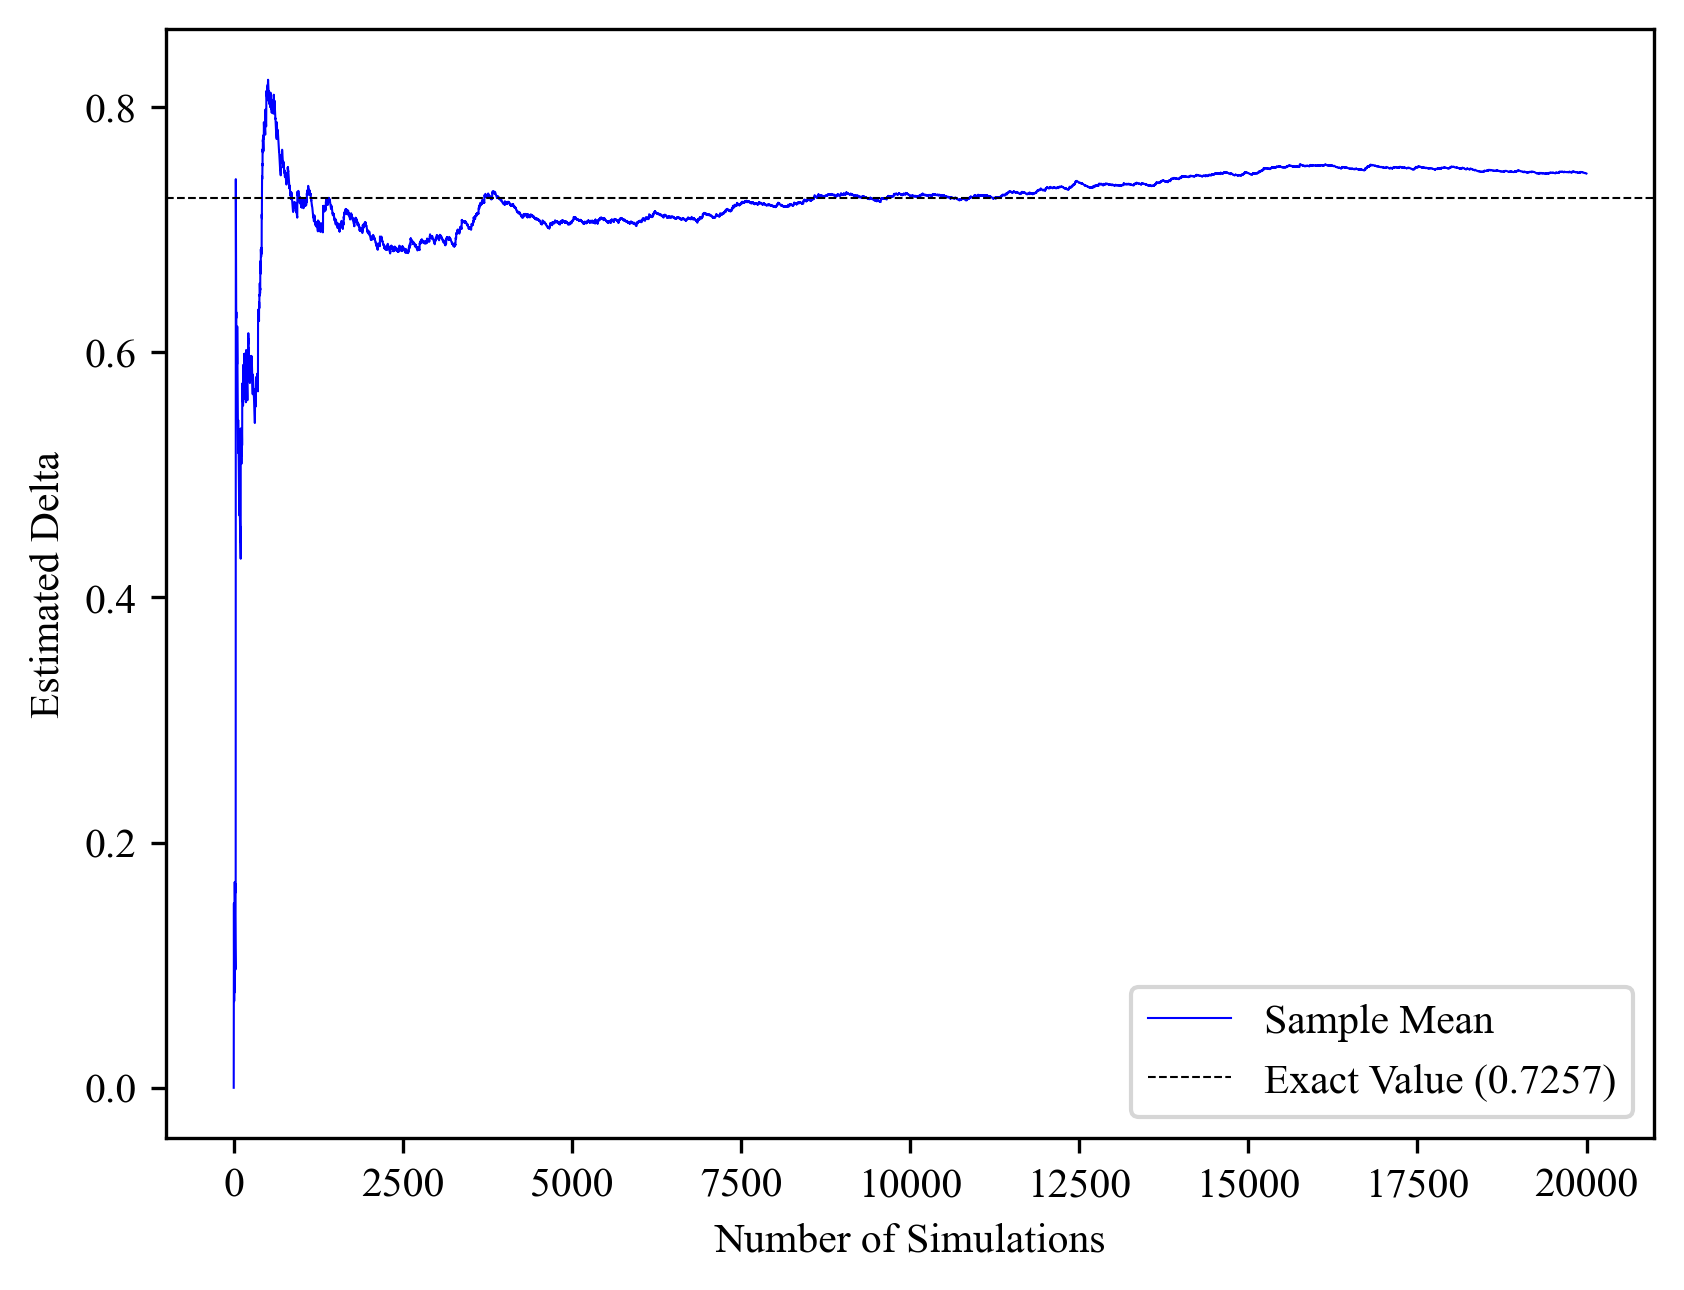

In [23]:
N = 20000                                                                           # Number of simulations
S0 = 100                                                                            # Initial asset price
T = 1                                                                               # Maturity date (in years)
r = 0.1                                                                             # Risk-free interest rate
sigma = 0.2                                                                         # Volatility
K = 100                                                                             # Strike price
d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))          # Parameter d
SAMPLE = []                                                                         # Initialise SAMPLE array 
PATH = []                                                                           # Initialize PATH array

for i in range(N):                                                                  # Iterate over the number of simulations
    W = np.random.normal(0, np.sqrt(T))                                             # At each simulation, generate a N(0,√T) random variable W, representing the value of the Brownian motion at maturity date T
    S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)                                 # Express the asset price S at maturity date T in terms of W (where S follows a geometric Brownian motion)
    V = max(S - K,0)                                                                # Express the option payoff V at maturity date T in terms of S
    SAMPLE.append(np.exp(-r*T)*V*W / (S0*T*sigma))                                  # Append the sampled Delta to the SAMPLE array
    PATH.append(sum(SAMPLE) / len(SAMPLE))                                          # Append the arithmetic mean of all previously sampled Deltas to the PATH array

plt.rcParams["font.family"] = "Times New Roman"                                     # Globally change the label font to Times New Roman
pd.Series(PATH).plot(linewidth = 0.5, color = "b")                                   # Plot the PATH array by value over index
plt.axhline(norm.cdf(d), color = "black", linestyle = "--", linewidth = 0.5)        # Draw a horizonal line having y-intercept the exact value of the Delta
plt.xlabel("Number of Simulations")                                                 # Label the x-axis
plt.ylabel("Estimated Delta")                                                       # Label the y-axis
plt.legend(["Sample Mean", "Exact Value (" + str(round(norm.cdf(d),4)) +")"])       # Add a legend
plt.rcParams['figure.dpi'] = 300                                                    # Improve the image resolution
plt.rcParams['savefig.dpi'] = 300                                                   # Improve the image resolution

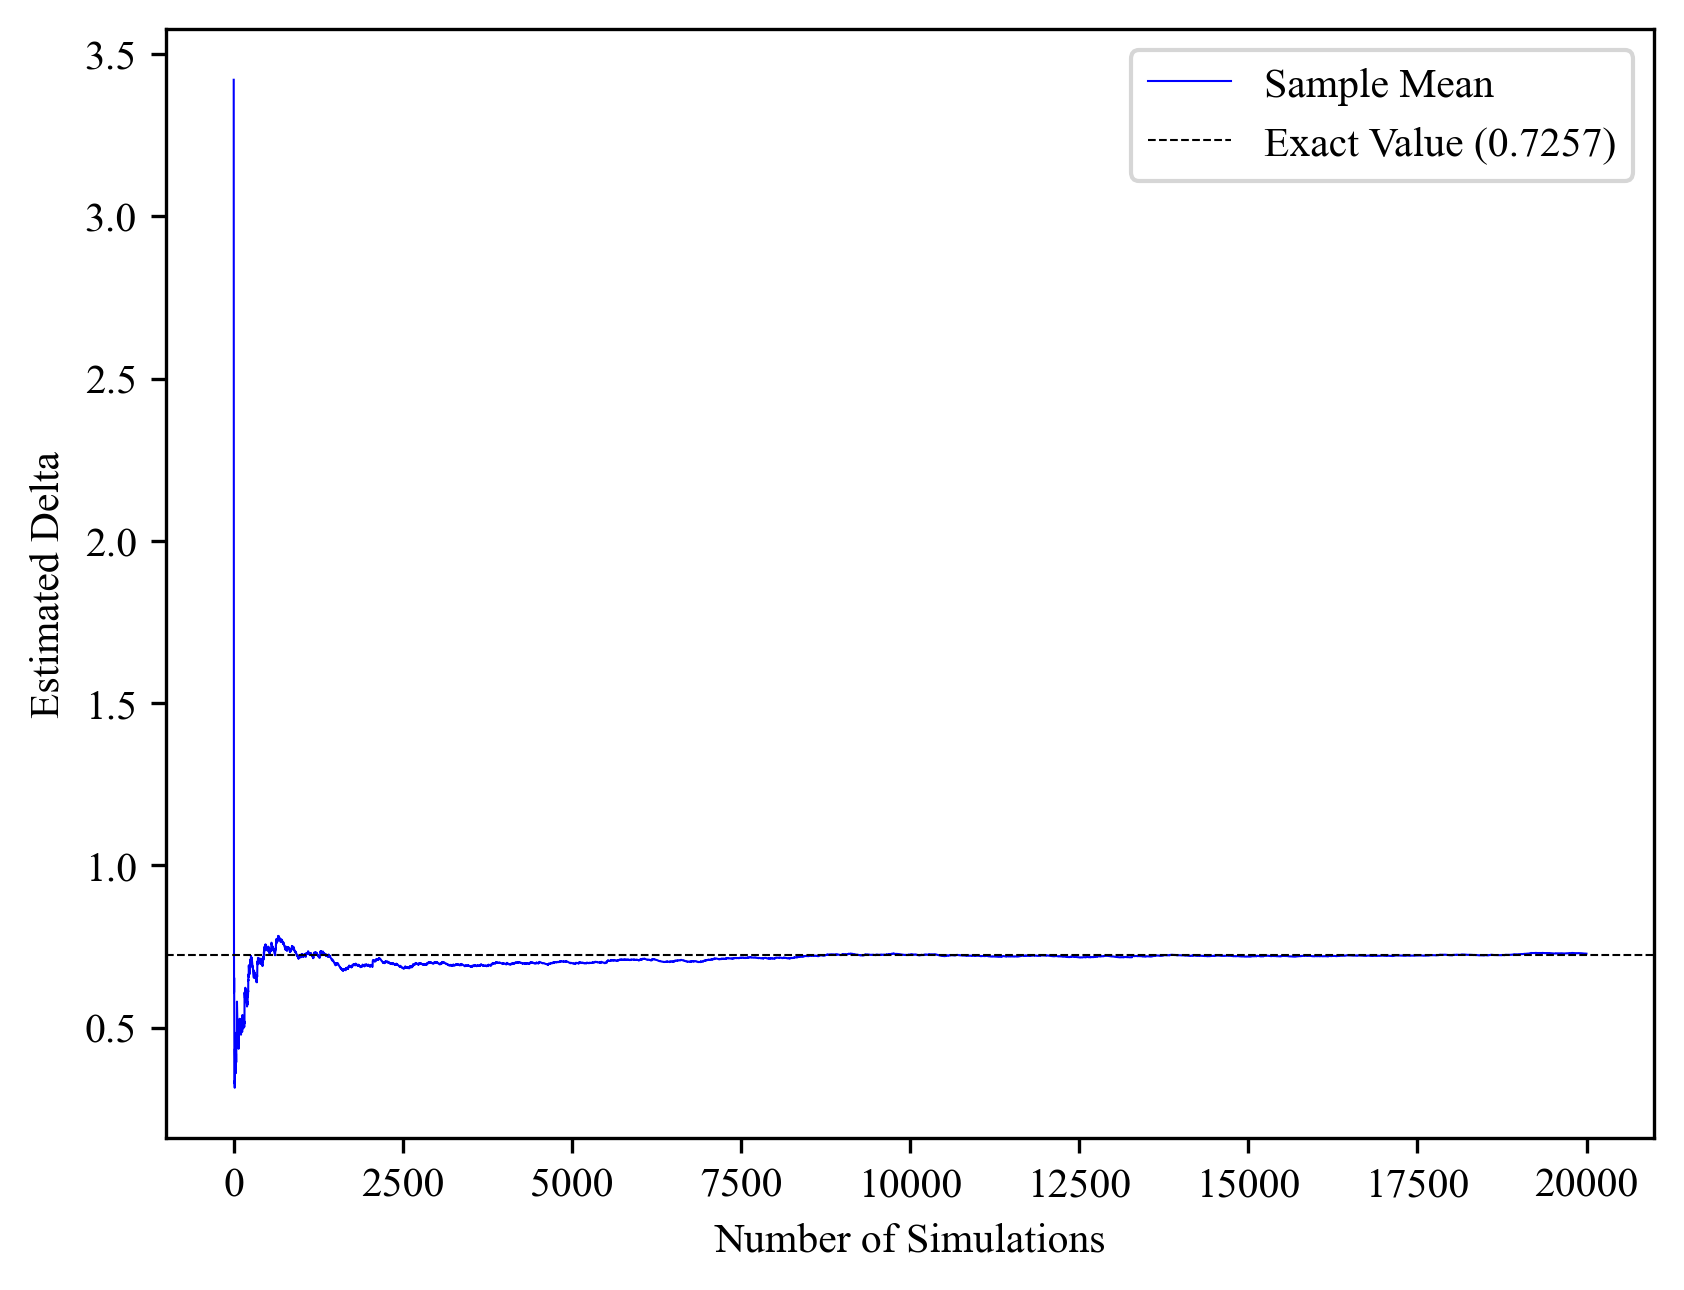

In [24]:
# Repeat the above algorithm, for variable arguments (r,sigma,S0,K,T,N)

def MonteCarloEuropeanCallDelta(r,sigma,S0,K,T,N):
    d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
    SAMPLE = []
    PATH = []  
    for i in range(N):
        W = np.random.normal(0, np.sqrt(T))                                             
        S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)                                 
        V = max(S - K,0)
        SAMPLE.append(np.exp(-r*T)*V*W / (S0*T*sigma))
        PATH.append(sum(SAMPLE) / len(SAMPLE))   
    plt.rcParams["font.family"] = "Times New Roman"
    pd.Series(PATH).plot(linewidth = 0.5, color = "b")    
    plt.axhline(norm.cdf(d), color = "black", linestyle = "--", linewidth = 0.5)                         
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Delta")
    plt.legend(["Sample Mean", "Exact Value (" + str(round(norm.cdf(d),4)) + ")"])
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300

MonteCarloEuropeanCallDelta(0.1,0.2,100,100,1,20000)

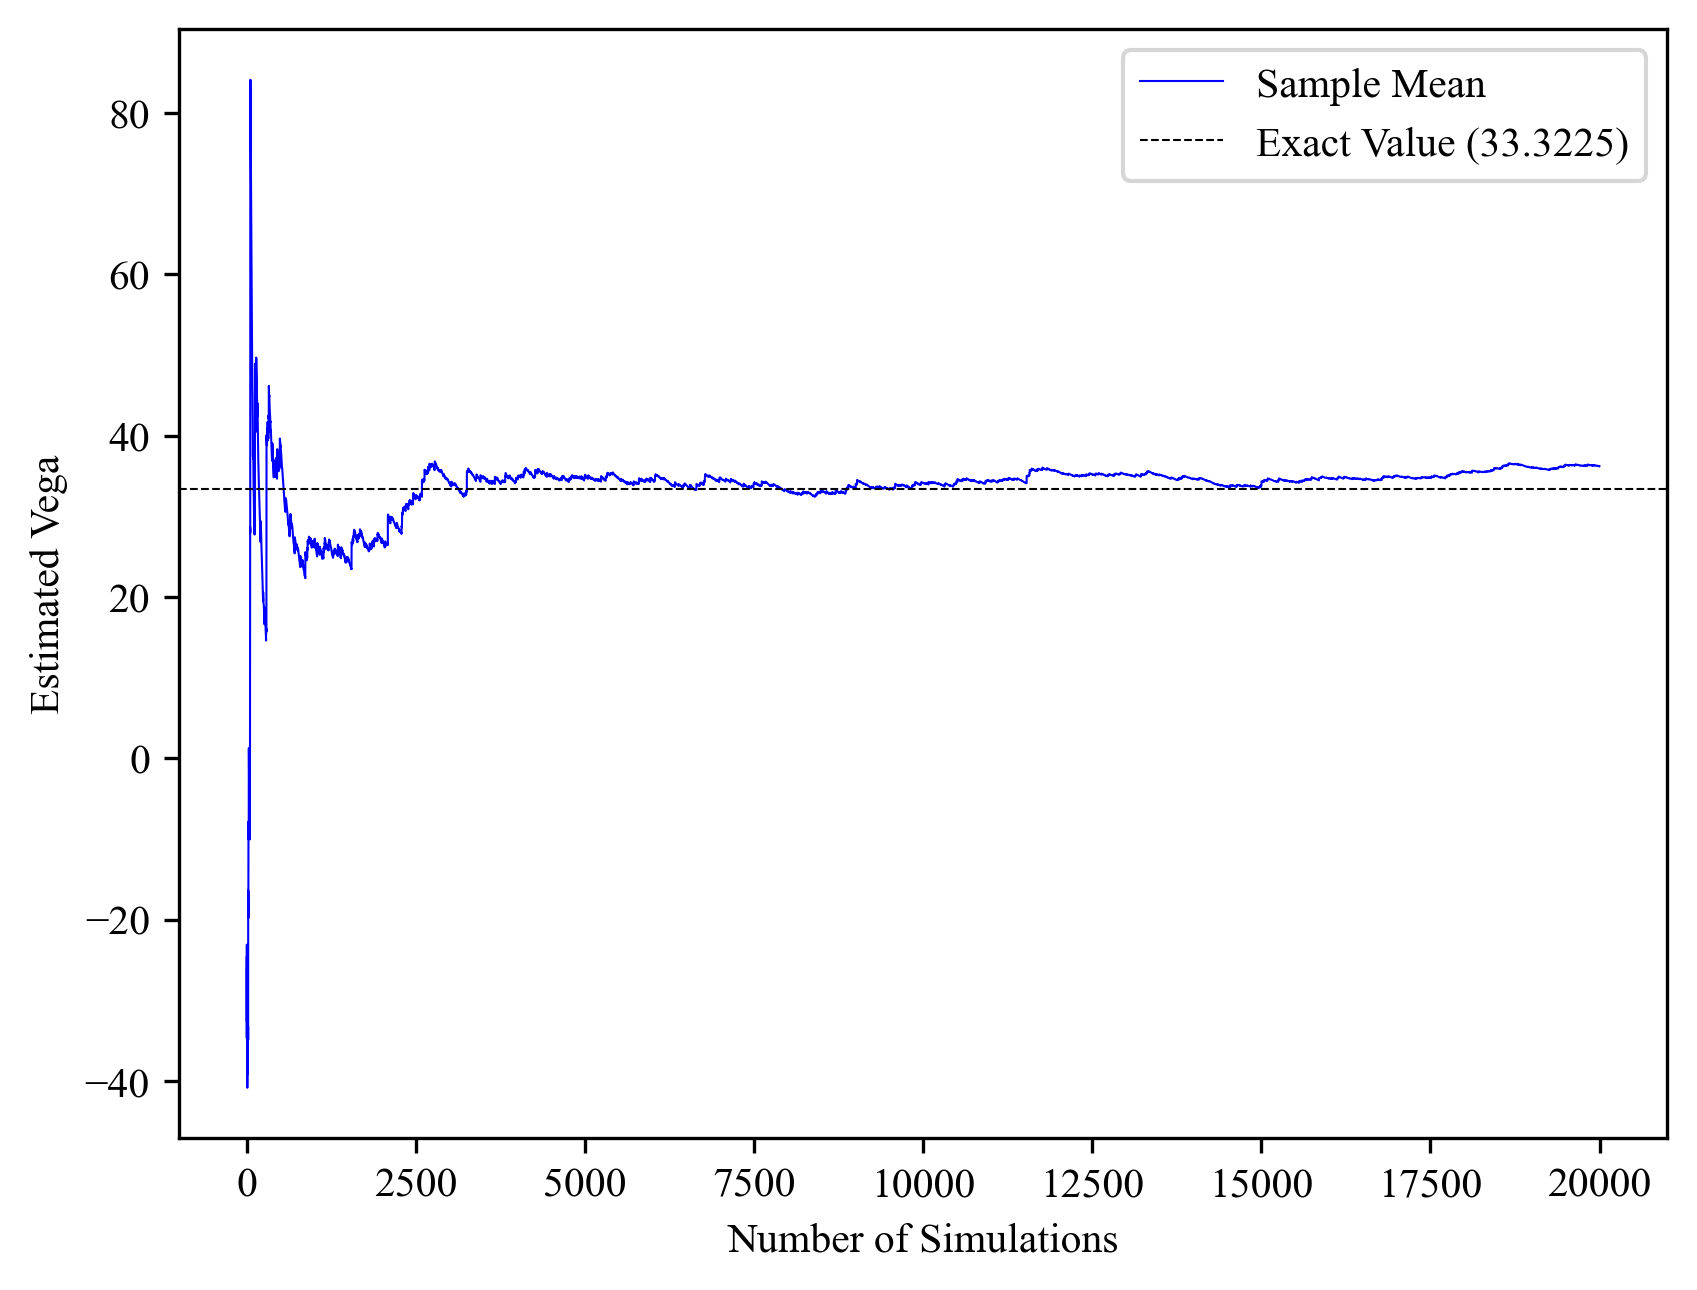

In [25]:
N = 20000                                                                                                           # Number of simulations
S0 = 100                                                                                                            # Initial asset price
T = 1                                                                                                               # Maturity date (in years)
r = 0.1                                                                                                             # Risk-free interest rate
sigma = 0.2                                                                                                         # Volatility
K = 100                                                                                                             # Strike price
d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))                                          # Parameter d
SAMPLE = []                                                                                                         # Initialise SAMPLE array 
PATH = []                                                                                                           # Initialize PATH array

for i in range(N):                                                                                                  # Iterate over the number of simulations
    W = np.random.normal(0, np.sqrt(T))                                                                             # At each simulation, generate a N(0,√T) random variable W, representing the value of the Brownian motion at maturity date T
    S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)                                                                 # Express the asset price S at maturity date T in terms of W (where S follows a geometric Brownian motion)
    V = max(S - K,0)                                                                                                # Express the option payoff V at maturity date T in terms of S
    SAMPLE.append(np.exp(-r*T) * V * (((W**2 - T) / (sigma * T)) - T))                                              # Append the sampled Vega to the SAMPLE array
    PATH.append(sum(SAMPLE) / len(SAMPLE))                                                                          # Append the arithmetic mean of all previously sampled Vegas to the PATH array

plt.rcParams["font.family"] = "Times New Roman"                                                                     # Globally change the label font to Times New Roman
pd.Series(PATH).plot(linewidth = 0.5, color = "b")                                                                  # Plot the PATH array by value over index
plt.axhline(S0*np.exp(-(d**2) / 2)*np.sqrt((T) / (2*np.pi)), color = "black", linestyle = "--", linewidth = 0.5)    # Draw a horizonal line having y-intercept the exact value of the Vega
plt.xlabel("Number of Simulations")                                                                                 # Label the x-axis
plt.ylabel("Estimated Vega")                                                                                        # Label the y-axis
plt.legend(["Sample Mean", "Exact Value (" + str(round(S0*np.exp(-(d**2) / 2)*np.sqrt((T) / (2*np.pi)),4)) + ")"])  # Add a legend
plt.rcParams['figure.dpi'] = 300                                                                                    # Improve the image resolution
plt.rcParams['savefig.dpi'] = 300                                                                                   # Improve the image resolution

<h3><b>b) Vega</b></h3>

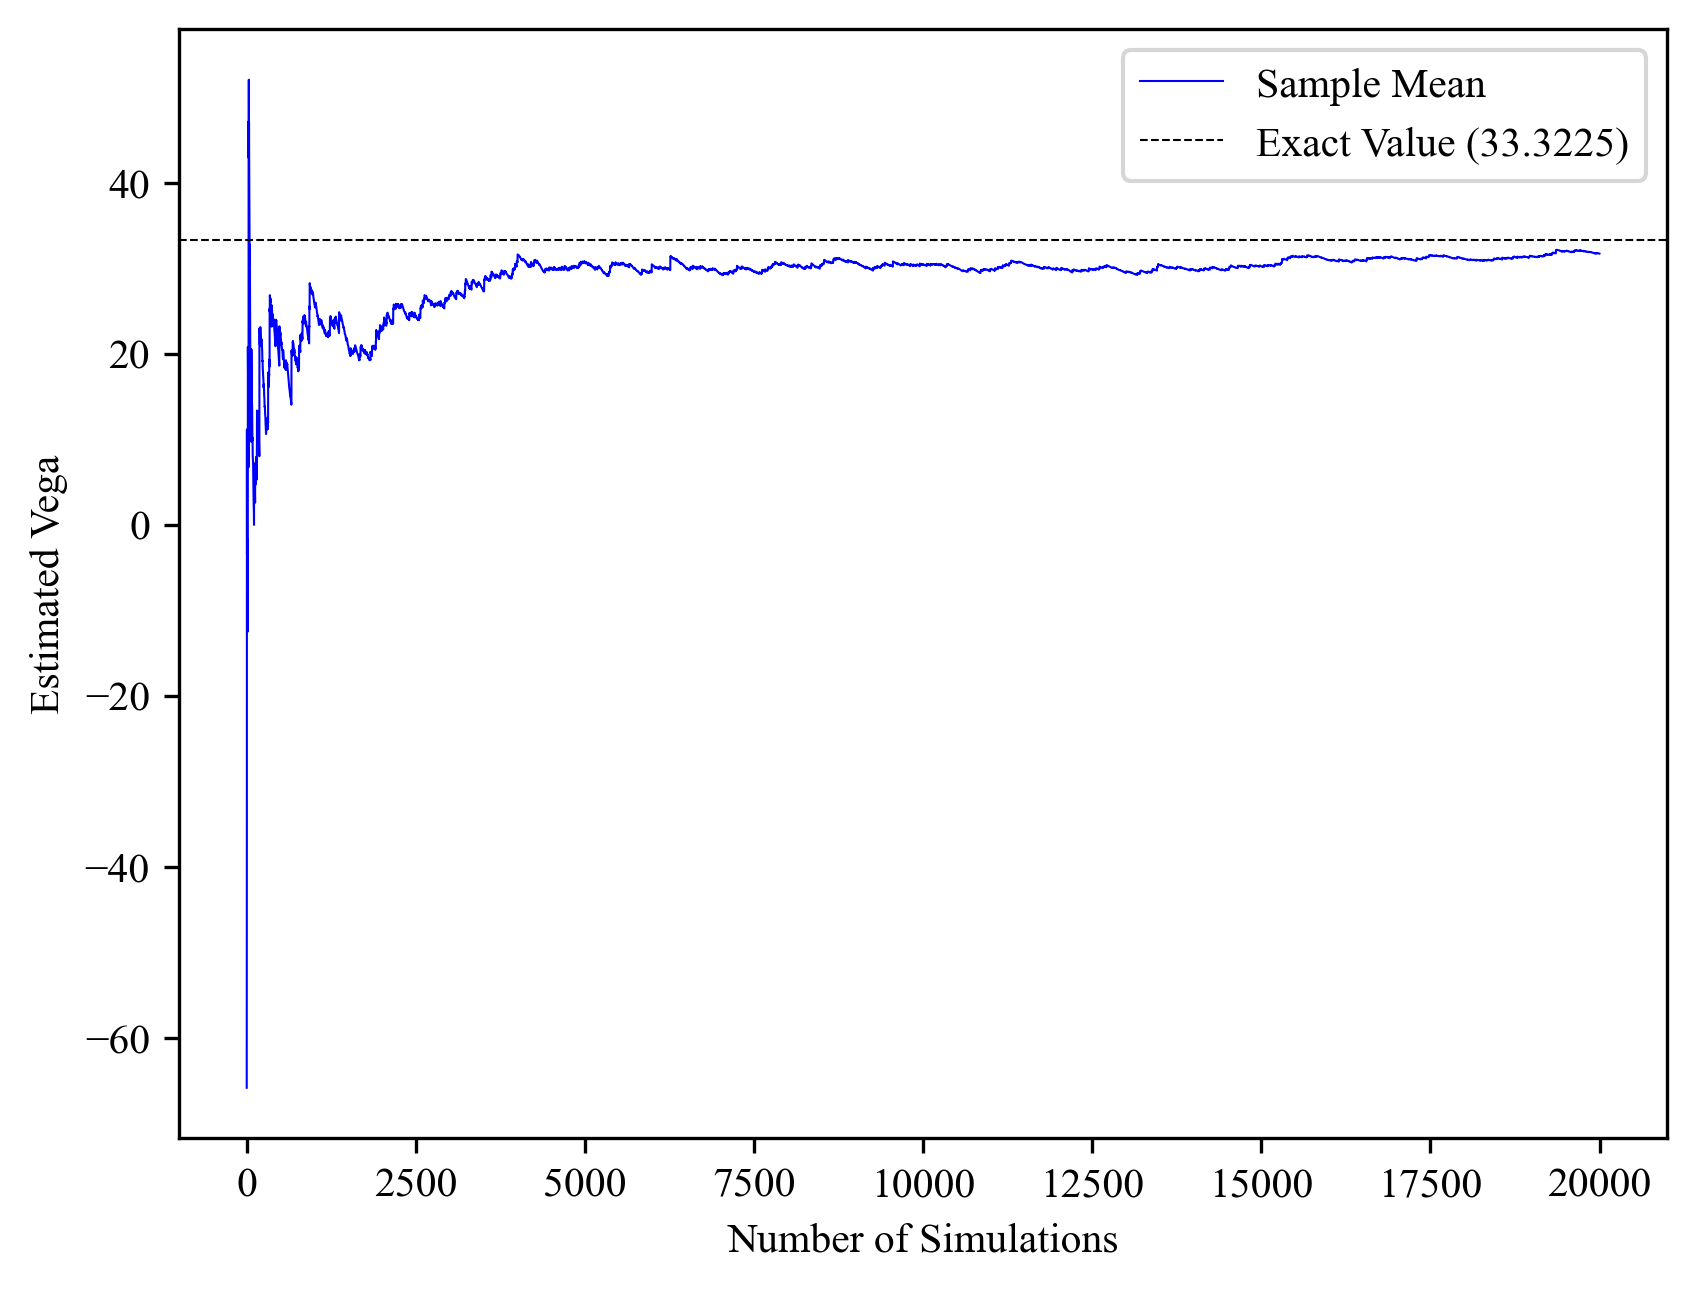

In [26]:
# Repeat the above algorithm, for variable arguments (r,sigma,S0,K,T,N)

def MonteCarloEuropeanCallVega(r,sigma,S0,K,T,N):
    d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
    SAMPLE = []
    PATH = []  
    for i in range(N):
        W = np.random.normal(0, np.sqrt(T))                                             
        S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)                                 
        V = max(S - K,0)
        SAMPLE.append(np.exp(-r*T) * V * (((W**2 - T) / (sigma * T)) - T))
        PATH.append(sum(SAMPLE) / len(SAMPLE))   
    plt.rcParams["font.family"] = "Times New Roman"
    pd.Series(PATH).plot(linewidth = 0.5, color = "b")    
    plt.axhline(S0*np.exp(-(d**2) / 2)*np.sqrt((T) / (2*np.pi)), color = "black", linestyle = "--", linewidth = 0.5)                
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Vega")
    plt.legend(["Sample Mean", "Exact Value (" + str(round(S0*np.exp(-(d**2) / 2)*np.sqrt((T) / (2*np.pi)),4)) + ")"])  
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300

MonteCarloEuropeanCallVega(0.1,0.2,100,100,1,20000)

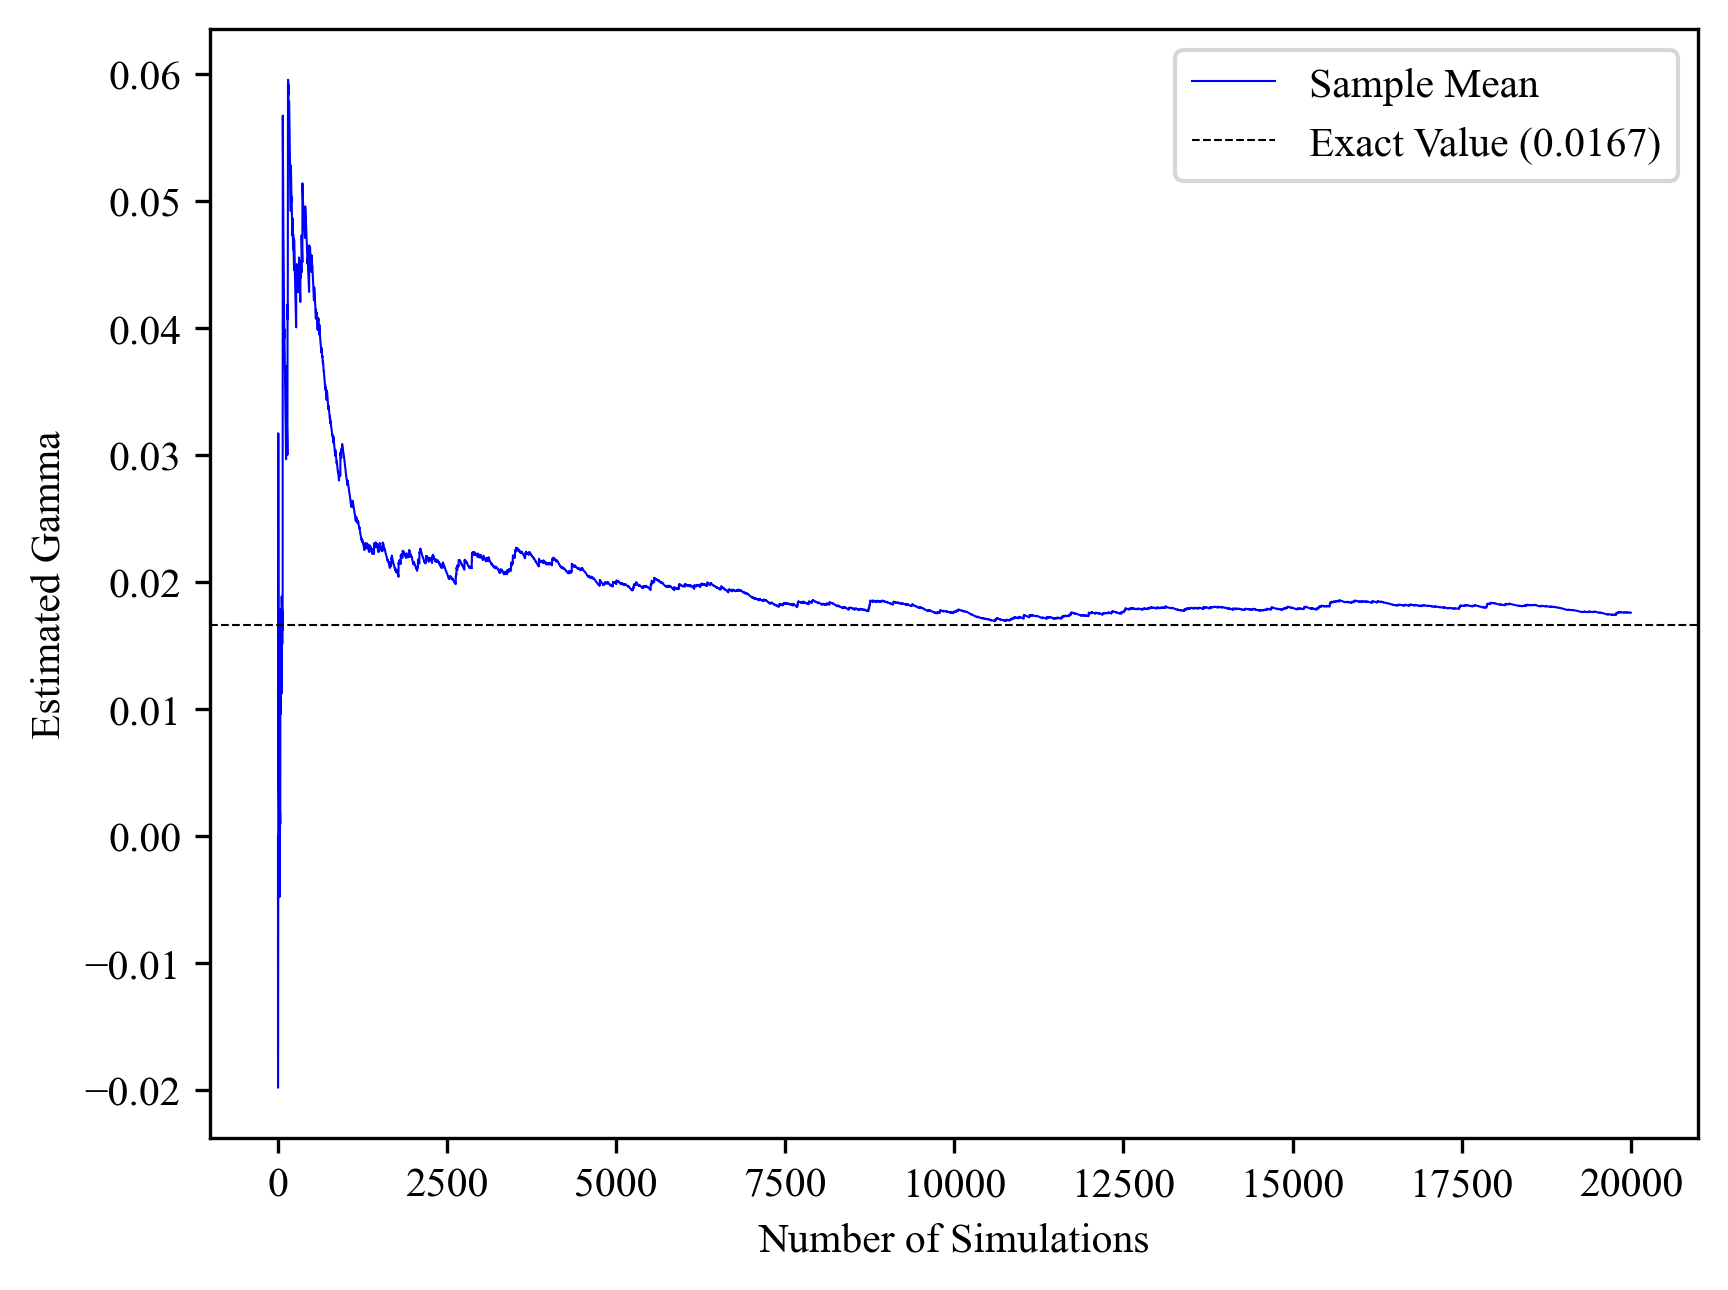

In [27]:
N = 20000                                                                                                                   # Number of simulations
S0 = 100                                                                                                                    # Initial asset price
T = 1                                                                                                                       # Maturity date (in years)
r = 0.1                                                                                                                     # Risk-free interest rate
sigma = 0.2                                                                                                                 # Volatility
K = 100                                                                                                                     # Strike price
d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))                                                  # Parameter d
SAMPLE = []                                                                                                                 # Initialise SAMPLE array 
PATH = []                                                                                                                   # Initialize PATH array

for i in range(N):                                                                                                          # Iterate over the number of simulations
    W = np.random.normal(0, np.sqrt(T))                                                                                     # At each simulation, generate a N(0,√T) random variable W, representing the value of the Brownian motion at maturity date T
    S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)                                                                         # Express the asset price S at maturity date T in terms of W (where S follows a geometric Brownian motion)
    V = max(S - K,0)                                                                                                        # Express the option payoff V at maturity date T in terms of S
    SAMPLE.append(((np.exp(-r*T)) / (sigma * T * S0**2)) * V * (((W**2 - T) / (sigma * T)) - T))                            # Append the sampled Gamma to the SAMPLE array
    PATH.append(sum(SAMPLE) / len(SAMPLE))                                                                                  # Append the arithmetic mean of all previously sampled Gammas to the PATH array

plt.rcParams["font.family"] = "Times New Roman"                                                                             # Globally change the label font to Times New Roman
pd.Series(PATH).plot(linewidth = 0.5, color = "b")                                                                          # Plot the PATH array by value over index
plt.axhline((np.exp(-(d**2) / 2)) / (S0*sigma*np.sqrt(2*np.pi*T)), color = "black", linestyle = "--", linewidth = 0.5)      # Draw a horizonal line having y-intercept the exact value of the Gamma
plt.xlabel("Number of Simulations")                                                                                         # Label the x-axis
plt.ylabel("Estimated Gamma")                                                                                               # Label the y-axis
plt.legend(["Sample Mean", "Exact Value (" + str(round((np.exp(-(d**2) / 2)) / (S0*sigma*np.sqrt(2*np.pi*T)),4)) + ")"])    # Add a legend
plt.rcParams['figure.dpi'] = 300                                                                                            # Improve the image resolution
plt.rcParams['savefig.dpi'] = 300                                                                                           # Improve the image resolution

<h3><b>c) Gamma</b></h3>

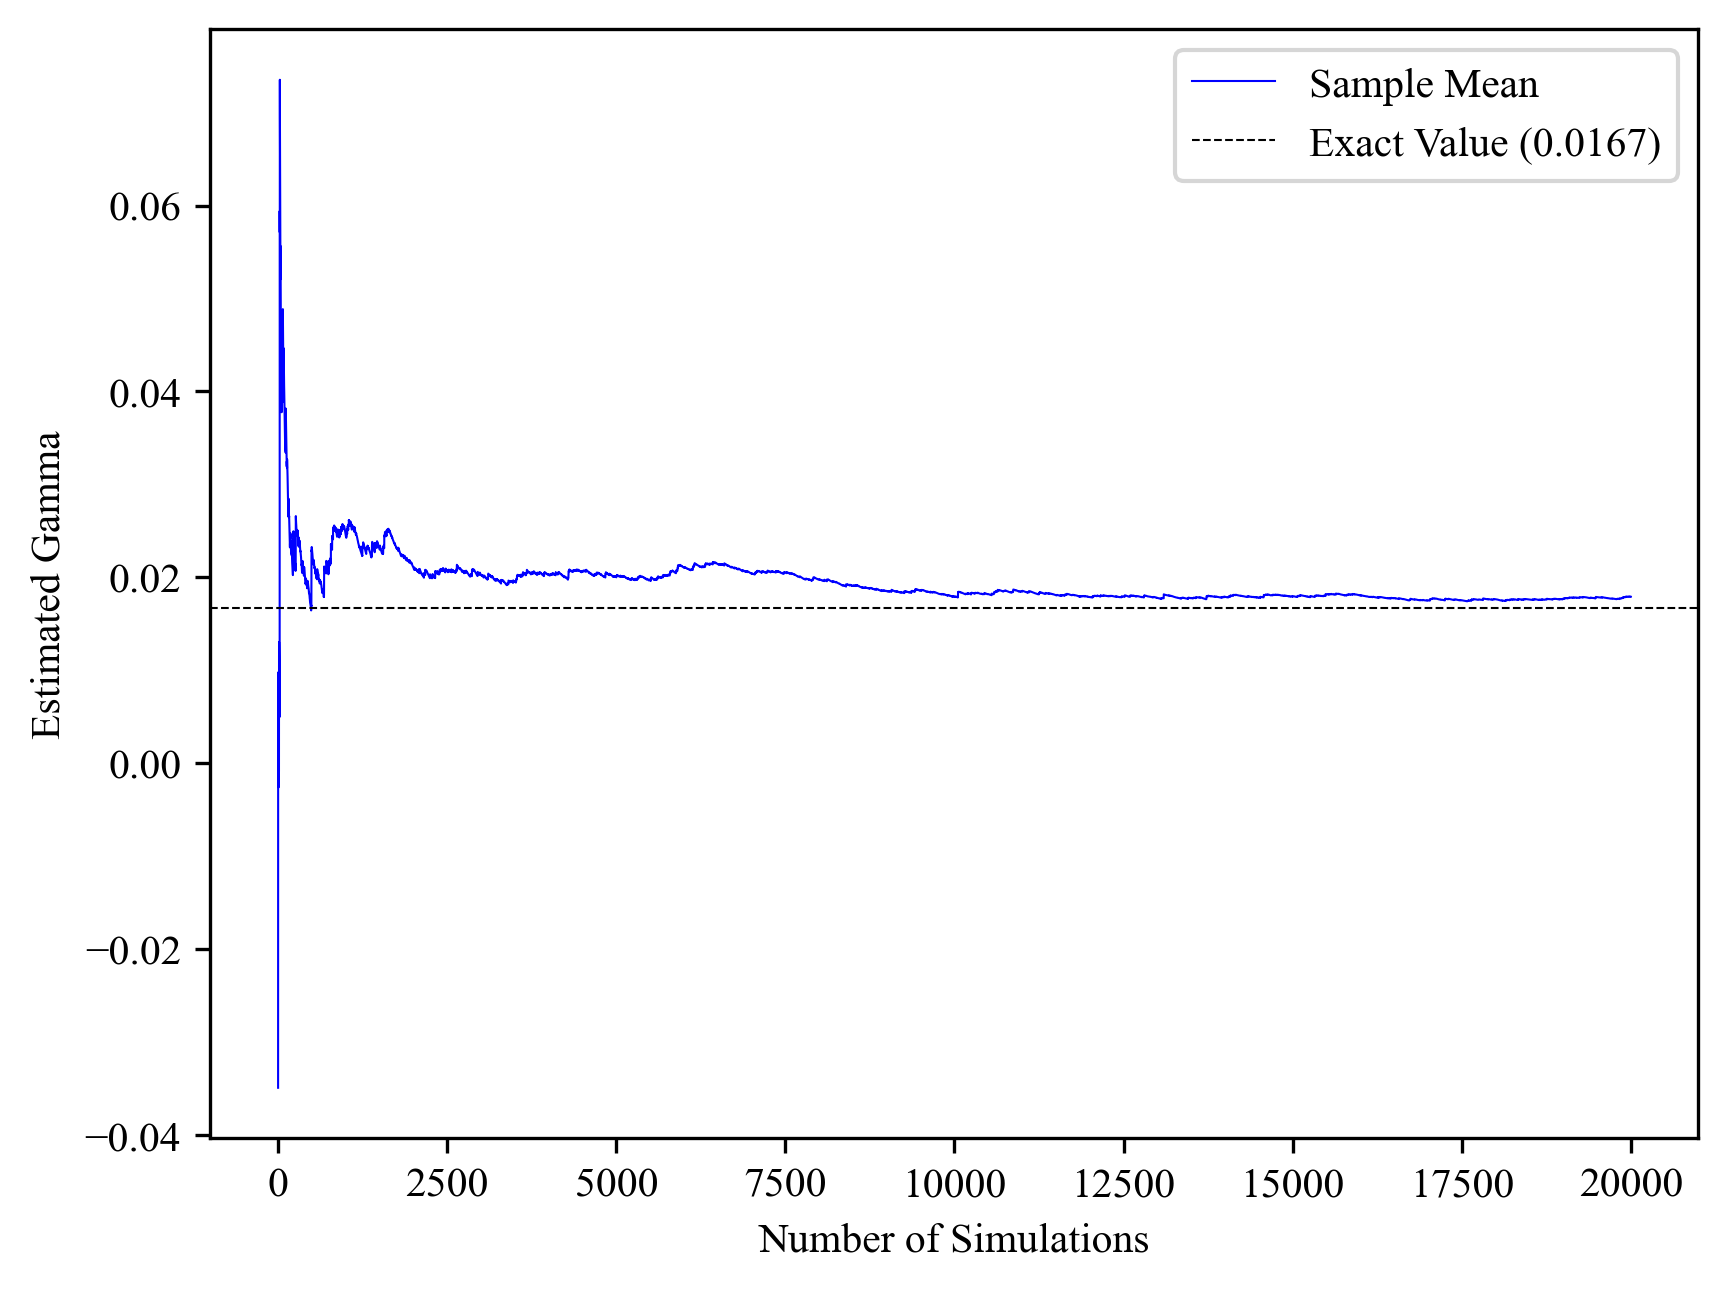

In [28]:
# Repeat the above algorithm, for variable arguments (r,sigma,S0,K,T,N)

def MonteCarloEuropeanCallGamma(r,sigma,S0,K,T,N):
    d = (np.log((S0) / (K)) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
    SAMPLE = []
    PATH = []  
    for i in range(N):
        W = np.random.normal(0, np.sqrt(T))                                             
        S = S0*np.exp((r - (sigma**2) / 2)*T + sigma*W)                                 
        V = max(S - K,0)
        SAMPLE.append(((np.exp(-r*T)) / (sigma * T * S0**2)) * V * (((W**2 - T) / (sigma * T)) - T))
        PATH.append(sum(SAMPLE) / len(SAMPLE))   
    plt.rcParams["font.family"] = "Times New Roman"
    pd.Series(PATH).plot(linewidth = 0.5, color = "b")    
    plt.axhline((np.exp(-(d**2) / 2)) / (S0*sigma*np.sqrt(2*np.pi*T)), color = "black", linestyle = "--", linewidth = 0.5)                
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Gamma")
    plt.legend(["Sample Mean", "Exact Value (" + str(round((np.exp(-(d**2) / 2)) / (S0*sigma*np.sqrt(2*np.pi*T)),4)) + ")"])
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300

MonteCarloEuropeanCallGamma(0.1,0.2,100,100,1,20000)